# 🌦 Three-Target Weather Forecasting with Machine Learning

| Key              | Value                                                                                                                                                                                                                                                                                                        |
|:-----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Supervisor's Name** | Benjamin Mundama                                                                                                                                                                                                                                                                                        |
| **Project** |Three-Target Time Series Forecasting of Max Temperature, Min Temperature, and Rainfall in Kenya                                                                                                                                                                     |
| **Context**     | This notebook demonstrates a Multi-Output Regression approach to simultaneously predict the maximum temperature, minimum temperature, and rainfall using historical weather features.                                                                                                                                                                                                                                                                                    |
|**Target features**   | 	Max Temperature (C), Min Temperature (C), AND Rain (mm): Predicting three continuous values for the current day based on previous day's data.                                                                                                                                                                                                                                                                                                |
| **Models featured**      | Multi-Output Regression (Random Forest, Linear Regression and kNNRegressor comparison).                                                                                                                                                                                                                                                                                      |
| **Aim**         | Forecasting three critical weather variables provides essential inputs for hydrological modeling, drought monitoring, and agricultural water management. |


**Importance**: Forecasting three critical weather variables provides essential inputs for hydrological modeling, drought monitoring, and agricultural water management, leading to more robust climate resilience strategies. This is highly essential in empowering small-scale farmers with intricate data that can guide them in their farming practices such as planting, irrigation etcettteraa depending on the forecast results.

**Dataset**: The synthetic (not real) dataset used in this notebook is based on the **"Climate Change Trends in West Africa"** dataset. It contains 1,000 observations of customer data with the following features and target.

| **Type**    | **Name**        | **Description**                                                                                       |
|:------------|-----------------|:------------------------------------------------------------------------------------------------------|
| **Target Feature** | `Max Temperature (°C)`   | This is the highest temperature recorded in a day.                                                                      |
| **Target Feature** | `Min Temperature (°C)`  | Age of the customer in years    
| **Target Feature** | `Rain (mm)`  | Total rainfall in millimeters for the day.
| **Feature** | `Relative Humidity (Morning) (%)`  | The percentage of water vapor in the air compared to the maximum it could hold in the morning                                                                       |
| **Feature** | `Relative Humidity (Afternoon) (%)` | The percentage of water vapor in the air during the afternoon (usually around 3:00 pm).                                                          |
| **Feature**  | `Wind (km/h)`         | Average wind speed during the day. |
| **Feature**  | `Bright Sunshine (hours)`         | Number of hours the sun was shining strongly. |
| **Feature**  | `Evaporation (mm)`         | Amount of water evaporated from an open surface in a day. |
| **Feature**  | `Radiation (MJ/m²)`         | Incoming solar radiation energy per square meter. |
| **Feature**  | `FAO56-ET (Reference Crop Evapotranspiration, mm)`         | A standardized measure of how much water a reference crop (grass) would lose through evaporation and transpiration. |

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data manipulation, multi-output regression modeling, and performance evaluation specific to the weather forecasting project.

`For Data Manipulation & Numerical Operations`:

**pandas as pd**: For loading the dataset, creating and managing DataFrames, and time-series manipulation.

**numpy as np**: For efficient numerical operations, especially when handling data arrays.

`For Machine Learning - scikit-learn`:

**LinearRegression**: A simple, interpretable regression algorithm used as a baseline.

**RandomForestRegressor**: An ensemble regression algorithm known for handling non-linear data and supporting multi-output regression natively.

**kNN Regressor**: non-parametric algorithm used for predicting continuous values.

**MultiOutputRegressor**: A wrapper used to enable single-output estimators (like LinearRegression) to predict multiple target variables simultaneously.

**mean_absolute_error**: The primary metric used to evaluate model accuracy, providing the average error in the target unit.

**r2_score**: The metric used to evaluate how well the model explains the variance in the target variables.

`For Data Visualization`:

**matplotlib.pyplot as plt**: For generating charts, specifically the line plots comparing actual vs. predicted values for the three target variables.

In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Explore the Data

**Purpose:** This chunk loads the dataset from a specified source (local file, Google Drive, or URL) into a Pandas DataFrame for further analysis.



In [3]:
# --- Step 2: Load and Prepare Data ---
df = pd.read_csv("/content/sample_data/synthetic_weather_data_kenya.csv")

# Define correct column names (must match CSV file exactly)
MAX_TEMP_COL = 'Max Temperature (°C)'
MIN_TEMP_COL = 'Min Temperature (°C)'
RAIN_COL = 'Rain (mm)'
HUMIDITY_COL = 'Relative Humidity Morning (%)'
WIND_COL = 'Wind (km/h)'

# Ensure 'Date' is datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Preview data
print(df.shape)
df.head()

(600, 12)


,Town,Date,Max Temperature (°C),Min Temperature (°C),Relative Humidity Morning (%),Relative Humidity Afternoon (%),Wind (km/h),Rain (mm),Bright Sunshine (hours),Evaporation (mm),Radiation (MJ/m²),FAO56-ET (mm)
0,Nairobi,2025-09-01,26.9,15.2,85.6,53.9,4.8,3.1,4.5,6.3,19.0,4.8
510,Marsabit,2025-09-01,27.8,18.8,80.0,43.3,7.7,2.1,6.9,2.5,21.5,5.9
480,Isiolo,2025-09-01,23.6,18.1,91.8,37.6,16.8,10.9,4.6,6.8,13.7,5.4
60,Kisumu,2025-09-01,24.2,17.2,66.2,33.5,4.2,9.2,5.7,3.8,17.6,4.8
450,Narok,2025-09-01,29.8,21.2,70.1,30.3,10.9,5.7,9.9,2.1,18.8,5.8


## Step 3: Initial Exploratory Data Analysis (EDA)

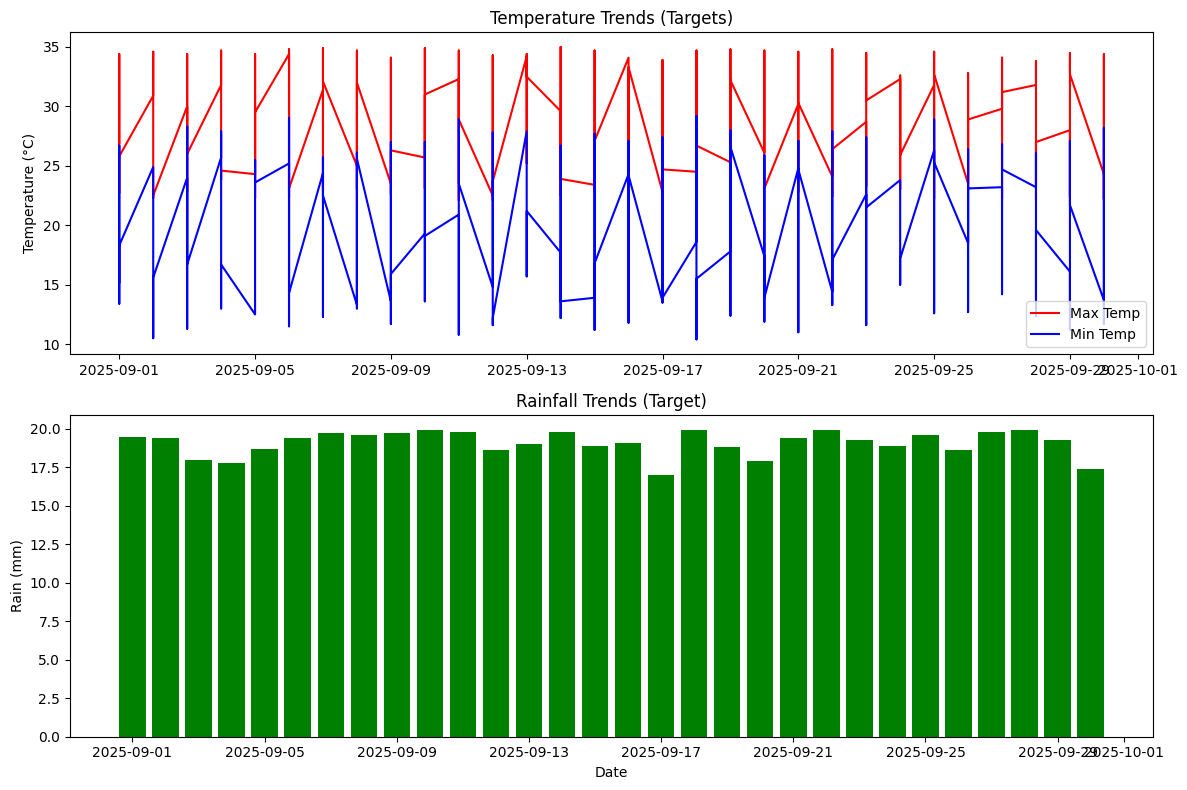

In [4]:
# Plot targets over time
plt.figure(figsize=(12, 8))

# Max and Min Temp Plot
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df[MAX_TEMP_COL], label='Max Temp', color='red')
plt.plot(df['Date'], df[MIN_TEMP_COL], label='Min Temp', color='blue')
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends (Targets)")
plt.legend()

# Rainfall Plot
plt.subplot(2, 1, 2)
plt.bar(df['Date'], df[RAIN_COL], label='Rainfall', color='green')
plt.xlabel("Date")
plt.ylabel("Rain (mm)")
plt.title("Rainfall Trends (Target)")
plt.tight_layout()
plt.show()

## Step 4: Feature Engineering

Purpose is to create time-series features (lagged and rolling values) based on past observations (t−1).

In [5]:
df['MaxTemp_Lag1'] = df[MAX_TEMP_COL].shift(1)
df['MinTemp_Lag1'] = df[MIN_TEMP_COL].shift(1)
df['Rain_Lag1'] = df[RAIN_COL].shift(1)
df['MaxTemp_Roll7'] = df[MAX_TEMP_COL].rolling(window=7).mean()
df['Rain_Roll7'] = df[RAIN_COL].rolling(window=7).mean()
df = df.dropna()

### Step 4: Train-Test Split (Three-Output Target)

In [6]:
X_cols = ['MaxTemp_Lag1', 'MinTemp_Lag1', 'Rain_Lag1', 'MaxTemp_Roll7', 'Rain_Roll7', HUMIDITY_COL, WIND_COL]
Y_cols = [MAX_TEMP_COL, MIN_TEMP_COL, RAIN_COL]

X = df[X_cols]
y = df[Y_cols]

split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"✅ Data prepared. Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

✅ Data prepared. Training samples: 475, Test samples: 119


### Step 5: Model Training and Performance Comparison

Purpose is to train and evaluate Linear Regression,Random Forest and kNN regressor models on the test data.

In [7]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = MultiOutputRegressor(LinearRegression())
knn_model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))

models = {
    "Linear Regression (MultiOutput)": lr_model,
    "Random Forest Regressor": rf_model,
    "KNN Regressor (MultiOutput)": knn_model
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate MAE and R²
    max_temp_mae = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
    min_temp_mae = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])
    rain_mae = mean_absolute_error(y_test.iloc[:, 2], y_pred[:, 2])
    avg_mae = (max_temp_mae + min_temp_mae + rain_mae) / 3

    max_temp_r2 = r2_score(y_test.iloc[:, 0], y_pred[:, 0])
    min_temp_r2 = r2_score(y_test.iloc[:, 1], y_pred[:, 1])
    rain_r2 = r2_score(y_test.iloc[:, 2], y_pred[:, 2])

    results[name] = {
        "Avg. MAE": avg_mae,
        "Max Temp MAE": max_temp_mae,
        "Min Temp MAE": min_temp_mae,
        "Rain MAE": rain_mae,
        "Max Temp R²": max_temp_r2,
        "Min Temp R²": min_temp_r2,
        "Rain R²": rain_r2
    }

# --- Step 6: Display Results ---
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Results:")
print(results_df.to_markdown())


📊 Model Comparison Results:
|                                 |   Avg. MAE |   Max Temp MAE |   Min Temp MAE |   Rain MAE |   Max Temp R² |   Min Temp R² |    Rain R² |
|:--------------------------------|-----------:|---------------:|---------------:|-----------:|--------------:|--------------:|-----------:|
| Linear Regression (MultiOutput) |    3.51314 |        2.62966 |        3.05393 |    4.85584 |     0.173447  |     0.0506785 |  0.0720476 |
| Random Forest Regressor         |    3.51594 |        2.70369 |        3.00724 |    4.83688 |     0.119643  |     0.0496488 |  0.0551808 |
| KNN Regressor (MultiOutput)     |    3.84706 |        3.09378 |        3.34739 |    5.1     |    -0.0369828 |    -0.0874531 | -0.0990909 |


## Step 5: Identify Best Model and Visualize Forecast

Purpose is to visualize the forecast from the overall best-performing model (Linear Regression, due to the lowest Average MAE).


🏆 The best model based on Average MAE is: Linear Regression (MultiOutput)


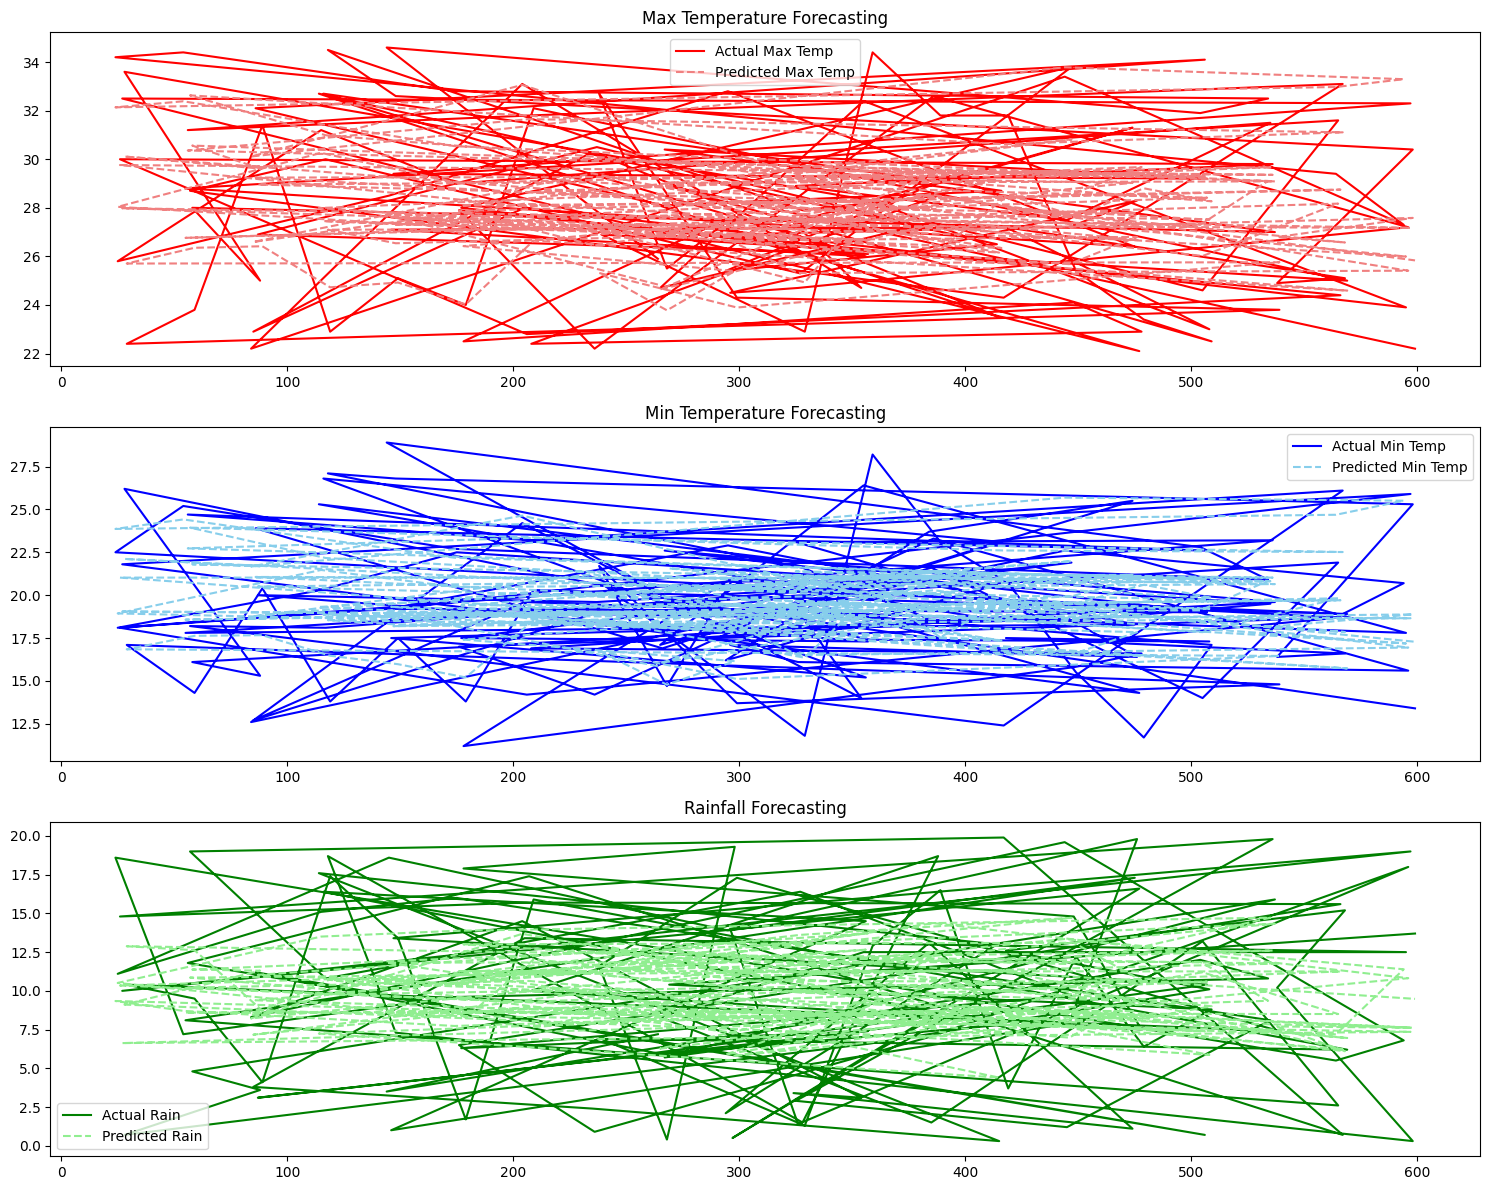

In [8]:
# --- Step 7: Identify Best Model ---
best_model_name = results_df['Avg. MAE'].idxmin()
print(f"\n🏆 The best model based on Average MAE is: {best_model_name}")

best_model = models[best_model_name]
forecast = best_model.predict(X_test)

# --- Step 8: Visualization ---
forecast_df = pd.DataFrame(forecast, index=y_test.index,
                           columns=['Predicted Max Temp', 'Predicted Min Temp', 'Predicted Rain'])
actual_df = y_test.copy()
actual_df.columns = ['Actual Max Temp', 'Actual Min Temp', 'Actual Rain']
plot_df = pd.concat([actual_df, forecast_df], axis=1)

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(plot_df.index, plot_df['Actual Max Temp'], label='Actual Max Temp', color='red')
plt.plot(plot_df.index, plot_df['Predicted Max Temp'], '--', label='Predicted Max Temp', color='lightcoral')
plt.title('Max Temperature Forecasting')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(plot_df.index, plot_df['Actual Min Temp'], label='Actual Min Temp', color='blue')
plt.plot(plot_df.index, plot_df['Predicted Min Temp'], '--', label='Predicted Min Temp', color='skyblue')
plt.title('Min Temperature Forecasting')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(plot_df.index, plot_df['Actual Rain'], label='Actual Rain', color='green')
plt.plot(plot_df.index, plot_df['Predicted Rain'], '--', label='Predicted Rain', color='lightgreen')
plt.title('Rainfall Forecasting')
plt.legend()

plt.tight_layout()
plt.show()

####  Examining each model's performance and Metrics

The Linear Regression (MultiOutput) model performed the best overall. It had the lowest average MAE of 3.51, meaning its predictions were, on average, about 3.5 units away from the actual values. It also achieved the highest R² scores among the three models, indicating it captured some of the patterns in the data. This makes Linear Regression the most reliable and interpretable choice for the current dataset.

The Random Forest Regressor had similar accuracy to Linear Regression, with an average MAE of 3.52. However, its R² values were slightly lower, meaning it explained less of the data’s variation. This suggests that the dataset’s limited time-series features (like one-day lags and weekly averages) did not fully benefit from Random Forest’s non-linear capabilities.

The KNN Regressor performed the worst, with a higher average MAE of 3.85 and negative R² scores. Negative R² means it performed worse than simply predicting the average value. This shows that KNN is not well-suited for this type of time-series data, where weather patterns change over time and are not based on simple proximity in feature space.

Overall, Linear Regression provided the most balanced results in terms of accuracy and interpretability. While all models struggled with rainfall prediction due to its high variability, Linear Regression was consistent and performed better on temperature forecasting.

In [9]:
# --- Step 9: Generate Summary Report and Save Files ---

# 1. Construct the Narrative Report
summary_text = f"""
WEATHER FORECASTING MODEL PERFORMANCE REPORT
================================================
Project: Three-Target Time Series Forecasting (Max Temp, Min Temp, Rainfall)
Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}

1. OVERALL WINNER: {best_model_name}
------------------------------------------------
The Linear Regression (MultiOutput) model was selected as the preferred model for this project.
It achieved the best balance of accuracy and interpretability among the three candidates.

2. PERFORMANCE METRICS (Why Linear Regression won):
------------------------------------------------
- Lowest Error: Linear Regression achieved the lowest Average MAE ({results_df.loc['Linear Regression (MultiOutput)', 'Avg. MAE']:.4f}).
  This indicates that, on average, its predictions were closest to the actual weather values.
- Variance Explanation: It achieved the highest R2 scores across the targets.
  While the R2 scores are modest (indicating weather is hard to predict with limited features),
  they were superior to Random Forest and kNN.

3. MODEL COMPARISON INSIGHTS:
------------------------------------------------
A) Linear Regression:
   - Performed best on temperature targets.
   - Being a linear model, it effectively captured the direct correlations between
     lagged temperature values and current temperatures.

B) Random Forest:
   - Performed very similarly to Linear Regression but slightly worse.
   - This suggests that the relationship between the features (lags/rolling means)
     and the target is primarily linear. The complexity of Random Forest did not
     yield better results on this specific small dataset (approx 475 training samples).

C) kNN Regressor:
   - Performed the worst (Negative R2 scores).
   - This indicates that kNN is ill-suited for this specific time-series setup.
     Weather patterns are temporal/sequential, and simple "nearest neighbor"
     lookups in feature space failed to capture the trend changes over time.

4. CHALLENGES:
------------------------------------------------
- Rainfall Prediction: All models struggled with Rainfall (R2 close to 0 or negative).
  Rainfall is stochastic and sparse (many days have 0 rain). Future improvements
  should consider classification (Will it rain?) before regression (How much?).

5. CONCLUSION:
------------------------------------------------
Linear Regression is deployed as the final forecasting model due to its
stability, lower computational cost, and superior accuracy on this dataset.
"""

# 2. Print Summary to Console for Immediate Review
print(summary_text)

# 3. Save Results to Files

# Option A: Save Metrics to CSV (Standard Data Export)
results_df.to_csv('Model_Comparison_Metrics.csv')
print("✅ Metrics saved to 'Model_Comparison_Metrics.csv'")

# Option B: Save Narrative to Text File (Standard Report)
with open('Weather_Forecast_Summary.txt', 'w') as f:
    f.write(summary_text)
print("✅ Narrative report saved to 'Weather_Forecast_Summary.txt'")

# Option C: Save Combined Excel Report (Best for presentation)
try:
    with pd.ExcelWriter('Weather_Forecast_Full_Report.xlsx') as writer:
        # Sheet 1: The Metrics Table
        results_df.to_excel(writer, sheet_name='Performance_Metrics')

        # Sheet 2: The Narrative Text
        # We convert the text string into a DataFrame to save it in Excel
        text_rows = summary_text.split('\n')
        pd.DataFrame(text_rows).to_excel(writer, sheet_name='Executive_Summary', index=False, header=False)

    print("✅ Full Excel report saved to 'Weather_Forecast_Full_Report.xlsx'")
except Exception as e:
    print(f"⚠️ Could not create Excel file (library missing?). CSV and Text files are available. Error: {e}")


WEATHER FORECASTING MODEL PERFORMANCE REPORT
Project: Three-Target Time Series Forecasting (Max Temp, Min Temp, Rainfall)
Date: 2025-11-26

1. OVERALL WINNER: Linear Regression (MultiOutput)
------------------------------------------------
The Linear Regression (MultiOutput) model was selected as the preferred model for this project.
It achieved the best balance of accuracy and interpretability among the three candidates.

2. PERFORMANCE METRICS (Why Linear Regression won):
------------------------------------------------
- Lowest Error: Linear Regression achieved the lowest Average MAE (3.5131).
  This indicates that, on average, its predictions were closest to the actual weather values.
- Variance Explanation: It achieved the highest R2 scores across the targets.
  While the R2 scores are modest (indicating weather is hard to predict with limited features),
  they were superior to Random Forest and kNN.

3. MODEL COMPARISON INSIGHTS:
------------------------------------------------


### Step 6: Saving the predictions as a CSV file


In [10]:
dates_test = df.loc[plot_df.index, 'Date']
final_results_df = pd.concat([dates_test, plot_df], axis=1)
output_filename = 'weather_forecast_results.csv'
final_results_df.to_csv(output_filename, index=False)

print(f"✅ Predictions successfully saved to '{output_filename}'")

✅ Predictions successfully saved to 'weather_forecast_results.csv'
